**Version A: Intermediate ML**




Author: Muhanned Shaheen

**Housing**
- The Problem
A house-flipping company would like to identify underpriced homes by comparing asking prices to predicted sale prices. They would like to segment homes into groups to analyze what kinds of homes there are. They would also like a model that predicts the selling price of a home.

# **Part 1: Clustering Instructions**:


## **Importing And Loading Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import set_config
set_config(transform_output='pandas')
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)


# import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from keras.layers import Dense, PReLU
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
fpath='/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/05-IntermediateML/Week20/Data/option_A_clustering_df - option_A_clustering_df.csv'
df=pd.read_csv(fpath)
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122,47
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122,48
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122,47
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122,48
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122,48


## **Exploring and cleaning the data**

In [ ]:
print(df.info())
print('\n')
print(f'- Number Of Null values is : {df.isna().sum().sum()}')
print(f'- Number Of Dublicated Values: {df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa


**Data set Shape**
  - **Rows:** 4944
  - **Columns:** 22



**Data Types**
  - All Feachers are numircal data types:
    - Integar: 20 Feacher
    - Float: 2 Feacher


**Data Cleaning**
- We Have 29 Dublicated Values.
Dublicated values will be handled throw droping them.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(f'Number Of dublicated Values Are: {df.duplicated().sum()}')

Number Of dublicated Values Are: 0


### Checking impossible values in numeric data types

In [ ]:
df.describe().round(2)

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915
mean,664544,1179,52,347,27,1937,597,335,102,171,0,55,8,149,4,3,0,1,1,1972,-122,48
std,298577,445,175,545,115,766,568,424,187,240,0,96,38,202,19,1,1,1,1,33,0,0
min,60000,260,0,0,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,1900,-123,47
25%,450000,880,0,0,0,1390,0,0,0,0,0,0,0,0,0,3,0,0,1,1952,-122,47
50%,630000,1170,0,0,0,1770,560,110,0,0,0,0,0,50,0,3,0,1,1,1966,-122,48
75%,789950,1450,0,580,0,2370,1070,570,190,400,1,80,0,250,0,4,1,1,2,2015,-122,48
max,1998000,3600,2000,3010,1220,6695,3070,2620,1090,1830,1,1060,620,1940,100,8,3,4,5,2019,-122,48


- There is no impossible values in the data set

In [ ]:
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122,47
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122,48
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122,47
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122,48
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122,48


In [ ]:
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122,47
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122,48
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122,47
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122,48
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122,48


## **Data Preparing For Modeling**


In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,-1,1,-0,-1,-0,2,2,3,-1,2,1,-0,-0,0,-0,3,-1,2,-1,-0,1,-2
1,-1,0,-0,-1,-0,0,0,1,-1,-1,1,-1,-0,1,-0,1,1,-1,-1,-1,-1,-0
2,0,-0,-0,2,-0,1,-1,-1,-1,1,-1,1,-0,-1,-0,1,1,-1,1,1,1,-1
3,-0,-1,-0,0,-0,-0,0,1,-1,-1,1,-1,-0,-0,-0,-0,1,-1,1,1,-1,-0
4,-0,3,-0,-1,-0,0,-1,-1,-1,1,-1,-0,-0,1,-0,-0,-1,-1,1,-0,1,1


## **KMeans models**

### Ploting and finding best cluster number

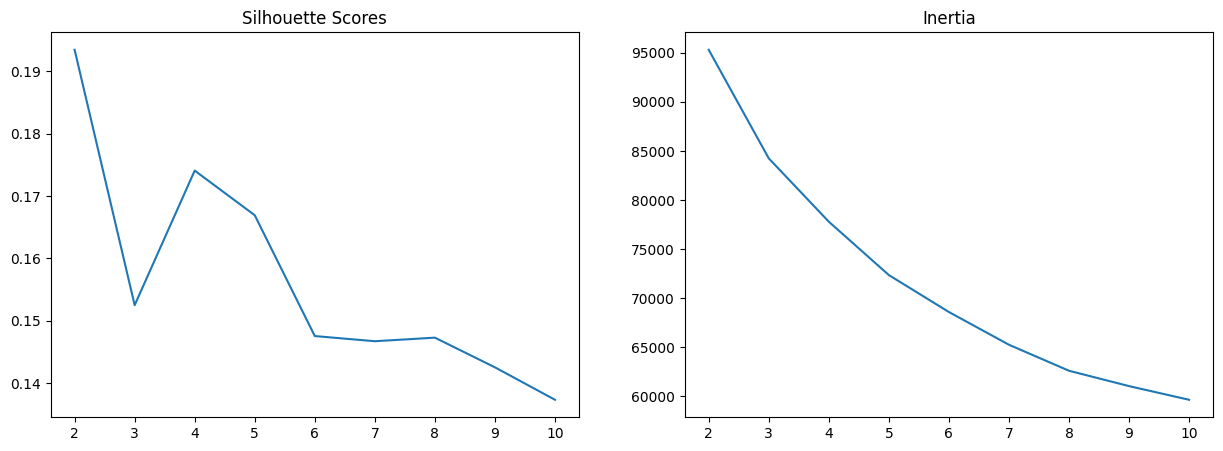

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(df_scaled)
  sils.append(silhouette_score(df_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)

#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

- The above line plot shows that the graph starts to level off at 3 clusters. there is an elbow on cluster 3 , but 5 clusters might be another suitable choice for a good number of clusters.

### Kmeans gouping

In [ ]:
kmeans = KMeans(n_clusters=5, n_init= 'auto', random_state=42)

kmeans.fit(df_scaled)



# Add the clusters as a column in the dataframe
df_scaled['cluster'] = kmeans.labels_
df_scaled.head()



,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude,cluster
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122,47,0
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122,48,3
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122,47,3
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122,48,3
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122,48,3


### Explanatory Analysis of KMeans Clusters


In [ ]:
cluster_groups = df_scaled.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,0,351182,1194,33,92,4,1539,436,220,87,180,0,43,7,84,3,3,0,0,1,1961,-122,47
1,1,774380,1123,62,449,41,2063,668,391,105,153,0,56,10,190,5,3,0,1,1,1979,-122,48
2,2,1565258,1545,84,871,27,3061,765,537,78,284,0,115,3,225,8,4,1,1,2,1974,-122,48
3,3,575224,1100,42,312,32,1807,596,322,116,144,0,44,9,143,4,3,0,1,1,1974,-122,48
4,4,1092419,1388,90,632,27,2576,749,440,101,235,0,98,8,189,7,4,0,1,2,1973,-122,48


- In order to remove sciantic notaion in sale price column it can be achived throw lambda function that formats each floating-point number with three decimal places.

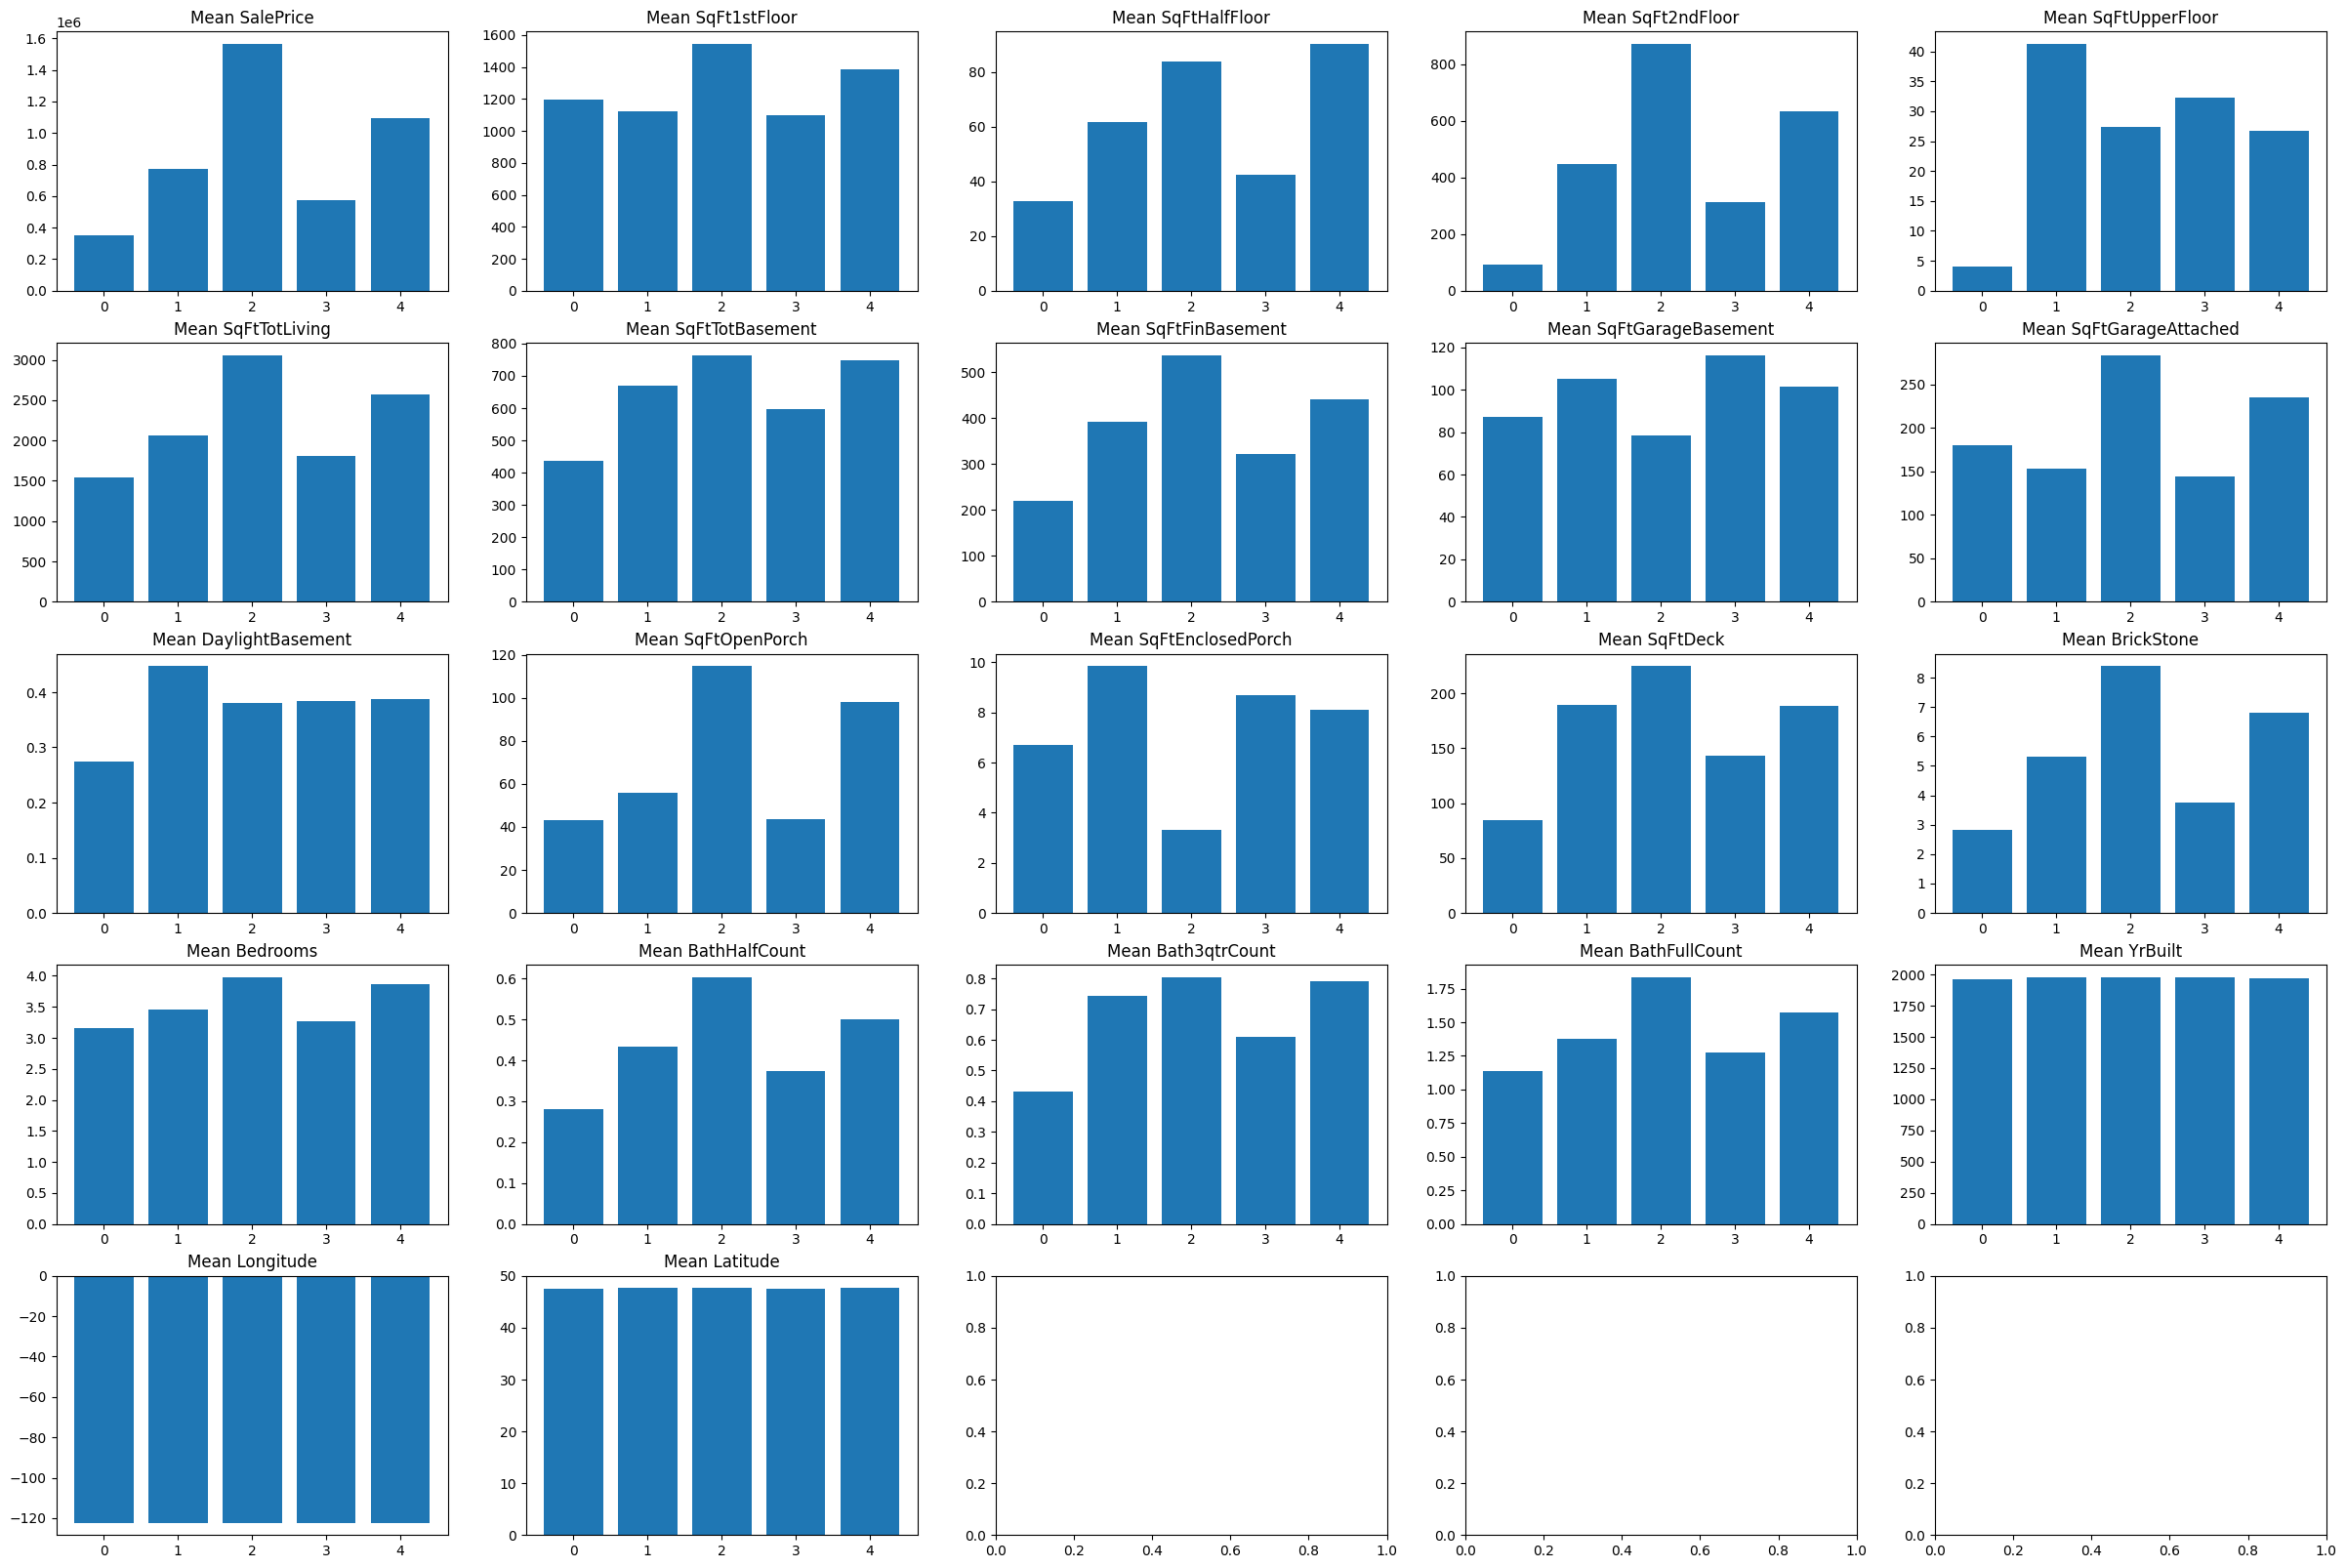

In [ ]:
# Visualize means
fig, axes = plt.subplots(5,5, figsize = (30, 20))
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

- **Cluster Analysis Report**:
- Cluster 0: cluster 0 represent lower-priced homes with moderate living space.
    - Average Sale Price: $351,182.
    - Average Total Living Area: 1,539 sqft.
    - Average Year Built: 1961.

- Cluster 1: Cluster 1 represent mid-priced homes with larger living space.
    - Average Sale Price: $774,380.
    - Average Total Living Area: 2,063 sqft.
    - Average Year Built: 1979.

- Cluster 2: cluster 2 represents higher-priced homes with the largest living space.
    - Average Sale Price: $1,565,258.
    - Average Total Living Area: 3,061 sqft.
    - Average Year Built: 1974.

- Cluster 3: cluster 3 represents moderately-priced homes with moderate living space.

    - Average Sale Price: $575,224
    - Average Total Living Area: 1,807 sqft
    - Average Year Built: 1974


- Cluster 4: cluster 4 represents higher-priced homes with large living space and modern features.

    - Average Sale Price: $1,092,419
    - Average Total Living Area: 2,576 sqft
    - Average Year Built: 1973

- **Important Differences between Clusters**:
Sale Price vs. Total Living Area:

these clusters graphs illustrate the relationship between sale price and total living area for each cluster. It shows how clusters  are differ in terms of pricing and living space.where incrasing in total living area increase the sales price increased.



# **Part 2: Modeling Instructions**


## **Loading Data**

In [ ]:
fpath_2='/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/06-AdvancedML/Week21/Data/option_A_modeling_df - option_A_modeling_df.csv'
df_2=pd.read_csv(fpath_2)
print(df_2.info())
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB
None


,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,PcntComplete,Longitude,Latitude,Golf Course,Other Great Outdoors,Elementary School,General Entertainment,Park,Mexican Restaurant,Vietnamese Restaurant,Gas Station,Housing Development,Playground,Pool,Church,Dive Bar,Convenience Store,Middle School,Grocery Store,Brewery,Bar,Salon / Barbershop,Post Office,Beach,Lake,Medical Center,Sandwich Place,Nail Salon,Pizza Place,Moving Target,Building,Preschool,Library,Trail,Farm,Community Center,High School,Gym / Fitness Center,Bridge,Gym,Supermarket,School,Dance Studio,Athletics & Sports,Garden,Airport,Beer Bar,Dog Run,Pharmacy,Scenic Lookout,Bank,Fast Food Restaurant,Miscellaneous Shop,Pet Store,Doctor's Office,Pub,Coffee Shop,Food Truck,Hardware Store,Bus Stop,Field,Laundry Service,Dentist's Office,Bus Station,Auto Dealership,Veterinarian,Tennis Court,Chinese Restaurant,Furniture / Home Store,Bus Line,Café,Event Space,Italian Restaurant,Marijuana Dispensary,Office,Yoga Studio,Restaurant,Baseball Field,Discount Store,Physical Therapist,American Restaurant,Martial Arts Dojo,Spa,Storage Facility,Daycare,General Travel,Burger Joint,Pet Service,Thai Restaurant,Chiropractor,Bakery,Mobile Phone Shop,Ice Cream Shop,Automotive Shop,Assisted Living,Health & Beauty Service,Fried Chicken Joint,Taco Place,Video Store,Financial or Legal Service,Massage Studio,Asian Restaurant,Insurance Office,Japanese Restaurant,ATM,Locksmith,Shipping Store,BldgGrade_4,BldgGrade_5,BldgGrade_6,BldgGrade_7,BldgGrade_8,BldgGrade_9,BldgGrade_10,BldgGrade_11,BldgGrade_12,FinBasementGrade_3,FinBasementGrade_4,FinBasementGrade_5,FinBasementGrade_6,FinBasementGrade_7,FinBasementGrade_8,FinBasementGrade_9,FinBasementGrade_10,HeatSystem_1,HeatSystem_2,HeatSystem_3,HeatSystem_4,HeatSystem_5,HeatSystem_6,HeatSystem_7,HeatSystem_8,Condition_2,Condition_3,Condition_4,Condition_5,MonthSold_02,MonthSold_03,MonthSold_04,MonthSold_05,MonthSold_06,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,0,-122.196399,47.336118,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,0,-122.361913,47.509874,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,0,-122.156684,47.437557,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,0,-122.370252,47.565146,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,0,-122.184194,47.730389,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Data set Shape**
  - **Rows:** 4937
  - **Columns:** 171


## **X , y and train test split Defination**

In [ ]:
X = df_2.drop(columns = ['SalePrice'])
y = df_2['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

- Scaling The Numaricl Data since all of our data are numurical.

In [ ]:
scaler = StandardScaler()

X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.transform(X_test)

## **PCA implementation**

In [ ]:
pca = PCA(n_components=0.95)

In [ ]:
# Apply PCA on imputed training and testing datasets
X_train_pca = pca.fit_transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)

In [ ]:
X_train_pca.head(3)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100,pca101,pca102,pca103,pca104,pca105,pca106,pca107,pca108,pca109,pca110,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,pca119,pca120,pca121,pca122,pca123,pca124,pca125,pca126,pca127,pca128,pca129,pca130,pca131,pca132,pca133,pca134,pca135,pca136,pca137,pca138,pca139,pca140,pca141,pca142
4093,-1.259311,0.185539,0.241762,2.999282,-0.698471,-1.096047,0.735827,-0.320556,2.025664,0.637873,1.937996,-0.468806,-1.059051,-1.188986,0.670233,0.943570,-0.756248,0.027163,0.398962,-1.557886,-0.050372,-0.744238,0.535130,0.246884,0.193823,-1.344476,-0.800533,-0.429129,-0.215659,0.638759,-0.002908,0.234060,0.124838,1.040072,-0.767658,-1.013815,-1.394532,-0.767372,-2.329179,0.053864,-1.173295,-0.825077,-0.822492,-0.002263,0.199401,-0.521677,-0.905588,-0.779533,-1.678557,1.624876,0.402693,0.224578,-0.287611,0.143541,0.097155,-1.160374,-0.663540,-0.195303,1.278957,0.226624,1.673702,-0.215992,-0.774488,-0.005179,-0.088906,0.293349,1.131880,1.975186,-0.082669,-1.872933,1.301399,-0.549807,-1.011883,0.452681,-0.328368,0.530531,-2.002963,-0.589712,0.048970,1.368065,1.253365,-0.178387,1.043015,-0.023893,0.381049,0.989205,-0.216983,1.618252,0.562629,-2.710371,1.059874,-0.658797,-0.255095,0.767835,0.173351,0.303016,0.190368,1.078518,0.343303,-1.539110,-0.223596,-0.544869,-1.703031,0.173339,0.785937,-0.781354,1.287112,0.015728,0.044982,0.065395,1.718572,1.882549,-1.054357,1.351228,0.216851,2.320756,-0.044278,-0.148209,1.161307,-1.521170,0.181809,0.205295,-0.216931,-0.457055,-0.931006,-0.063288,0.761869,-0.757879,0.235370,1.641573,-0.335417,0.122323,-0.571322,-0.839005,-0.552546,0.218168,-0.387615,-0.389168,0.288335,-1.106660,0.573580,0.094655,0.305361
2585,-3.487334,1.379498,-1.701584,0.442732,0.759616,0.668164,-1.435951,-0.059520,-2.610046,-0.918234,0.041124,-1.081404,0.033720,-3.448966,-0.297216,0.708416,0.345576,-0.394857,-1.149844,-0.268599,0.555399,-0.665597,-0.514737,0.350416,1.077737,1.596356,-1.226352,1.846635,-1.456875,2.538042,-1.700690,1.253734,1.923233,3.413419,-2.332841,-1.108733,1.607332,-0.271236,-0.254087,-0.183309,1.352714,1.823606,1.499448,0.892161,1.670334,2.653412,-0.843081,-0.782829,-0.001619,-0.054896,-0.666931,2.075937,-0.281796,-0.613337,0.786318,2.477957,0.334689,0.037796,0.145843,0.074780,1.914905,-1.106294,-1.045574,2.335194,0.562363,1.404065,-0.353674,-1.494948,-0.293933,-0.274188,-0.119405,-2.114757,0.594792,-0.439018,0.703428,-1.081007,-0.355719,-1.889733,-0.847774,2.130622,-1.069152,-0.146546,-0.062105,-2.755885,-2.987092,1.114915,0.206677,-3.139479,1.525125,-0.264703,-0.909240,1.662428,1.509444,2.418528,0.635735,-2.722858,-1.385423,-2.858372,-0.697152,2.324182,-1.040407,-0.963772,-0.361745,-0.424004,1.137571,0.961317,0.822181,-0.675513,-1.203855,0.723614,-0.162952,-0.085749,-0.053741,0.750952,0.137825,1.844498,-0.037242,-1.280260,-0.250666,-1.173862,-1.903547,-0.291517,-0.659982,2.259744,0.304371,-0.480137,-0.462481,-1.640160,0.931814,-0.849125,0.744401,0.219298,1.298120,-0.654051,-0.756236,-0.578973,1.891422,-0.808812,-0.105471,1.175554,-0.040867,-0.633861,1.361386
4189,-2.314158,-0.779577,-0.160359,-0.416086,1.584340,-1.849926,0.295963,0.794933,-0.149718,-0.200277,-0.309620,0.638069,-1.353585,0.673307,-2.032643,1.152544,2.379277,1.184915,-0.349957,-0.390099,0.124687,-0.154020,0.087171,-0.119345,-0.598249,1.899153,0.083928,1.016232,-0.665136,-2.743439,1.095096,0.378711,2.029737,1.236147,1.412885,-0.892181,1.327628,0.510723,0.61139

## **Deep learning models**

- Plot history predinfed funcation

In [ ]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [ ]:
# input shape defination
input_shape = X_train_pca.shape[1]
input_shape

143

##  **Model 1**

- In the first model , we will use the following as a first step in building the model:
  - Inpuer layer: 1
  - hidden layers: 2
  - Ealry stopping = 10.
  - Dropout = 20%.
  - Epoch: 50.


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(143,
                input_dim =input_shape,
                activation = 'relu'))

    model.add(Dense(100,
                activation = 'relu'))

    model.add(Dense(50,
                activation = 'relu'))

    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'nadam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])


    return model

In [ ]:
# Call our build function to build model
model_1 = build_model()

# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 143)               20592     
                                                                 
 dense_1 (Dense)             (None, 100)               14400     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 40093 (156.61 KB)
Trainable params: 40093 (156.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(X_train_pca, y_train,
                    validation_split=.2,
                      epochs=50,
                   verbose=1, callbacks = [early_stopping])

Epoch 1/50
93/93 [==============================] - 4s 11ms/step - loss: 525781368832.0000 - mean_absolute_error: 663001.2500 - root_mean_squared_error: 725107.8125 - val_loss: 553107193856.0000 - val_mean_absolute_error: 672385.7500 - val_root_mean_squared_error: 743711.7500
Epoch 2/50
93/93 [==============================] - 1s 6ms/step - loss: 517543428096.0000 - mean_absolute_error: 657536.8125 - root_mean_squared_error: 719404.9375 - val_loss: 531869040640.0000 - val_mean_absolute_error: 658609.5625 - val_root_mean_squared_error: 729293.5000
Epoch 3/50
93/93 [==============================] - 1s 7ms/step - loss: 461961297920.0000 - mean_absolute_error: 620631.5625 - root_mean_squared_error: 679677.3750 - val_loss: 435306397696.0000 - val_mean_absolute_error: 594250.8125 - val_root_mean_squared_error: 659777.5625
Epoch 4/50
93/93 [==============================] - 1s 7ms/step - loss: 310612754432.0000 - mean_absolute_error: 504381.1250 - root_mean_squared_error: 557326.4375 - val_l

- The training of the model completed all the 50 epoch that were giving

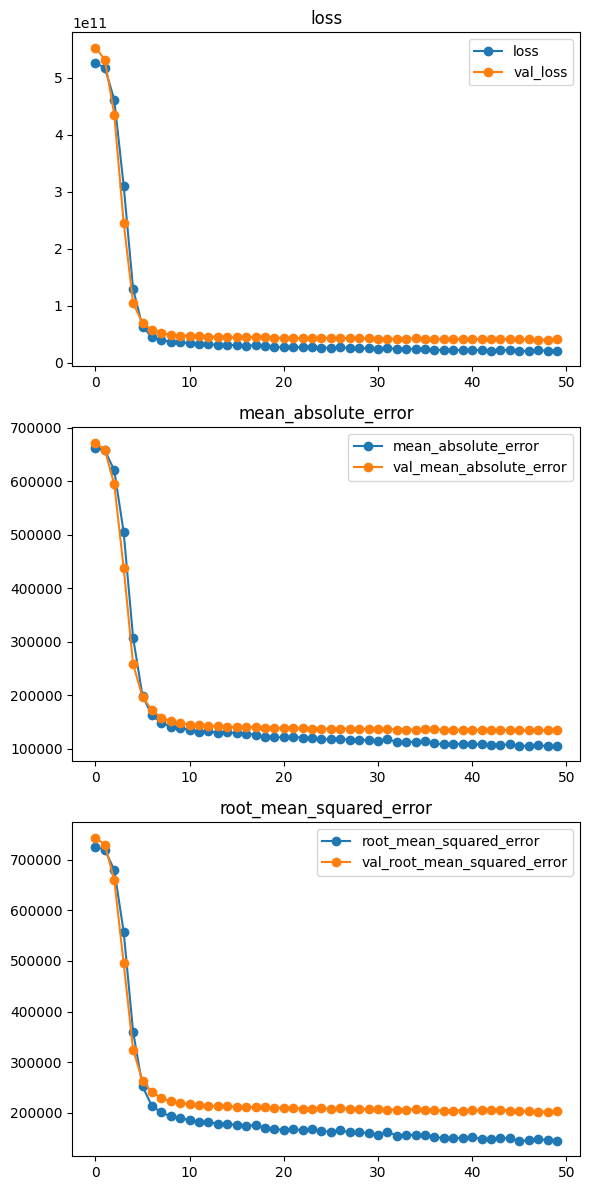

In [ ]:
# plot learning
plot_history(history_1);

- The plot indicated that the model is still learning.:
there is a room to fix it in the next models

In [ ]:
# evaluate model

y_pred = model_1.predict(X_test_pca)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')


39/39 [==============================] - 0s 2ms/step
final RMSE: 198574.96563276573
final MAE: 138760.96680161942
final R2: 0.5488115157874176


-  R2:  it explains that 54% of the variance in the target variable.
- MAE: the model tends to make an error of around $138,760 in predicting home selling price.

- RMSE: our model predictions make an error of from the actual selling prices by around $198,574.


## **Model 2**

- In model 2 , we will decrease number of layers , increase number of epochs.

- In the seconed model , we will use the following as a first step in building the model:
  - Inpuer layer: 1
  - hidden layers: 1
  - Ealry stopping = 10.
  - Dropout = 20%.
  - Epoch: 200.


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(120,
                input_dim =input_shape,
                activation = 'relu'))

    model.add(Dense(100,
                activation = 'relu'))


    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'nadam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])
    return model

In [ ]:
# Call our build function to build model
model_2 = build_model()

# Get model summary
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 120)               17280     
                                                                 
 dense_33 (Dense)            (None, 100)               12100     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_34 (Dense)            (None, 1)                 101       
                                                                 
Total params: 29481 (115.16 KB)
Trainable params: 29481 (115.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(X_train_pca, y_train,
                    validation_split=.2,
                      epochs=200,
                   verbose=1, callbacks = [early_stopping])

Epoch 1/200
93/93 [==============================] - 2s 8ms/step - loss: 525998129152.0000 - mean_absolute_error: 663152.0625 - root_mean_squared_error: 725257.3125 - val_loss: 554229235712.0000 - val_mean_absolute_error: 673156.8125 - val_root_mean_squared_error: 744465.7500
Epoch 2/200
93/93 [==============================] - 0s 4ms/step - loss: 525555793920.0000 - mean_absolute_error: 662856.0000 - root_mean_squared_error: 724952.2500 - val_loss: 553389981696.0000 - val_mean_absolute_error: 672617.0625 - val_root_mean_squared_error: 743901.8750
Epoch 3/200
93/93 [==============================] - 0s 5ms/step - loss: 523981029376.0000 - mean_absolute_error: 661848.6875 - root_mean_squared_error: 723865.3125 - val_loss: 551048970240.0000 - val_mean_absolute_error: 671174.6250 - val_root_mean_squared_error: 742326.7500
Epoch 4/200
93/93 [==============================] - 0s 4ms/step - loss: 520245411840.0000 - mean_absolute_error: 659556.7500 - root_mean_squared_error: 721280.3750 - va

- The training of the model completed all the givin 200: epochs.

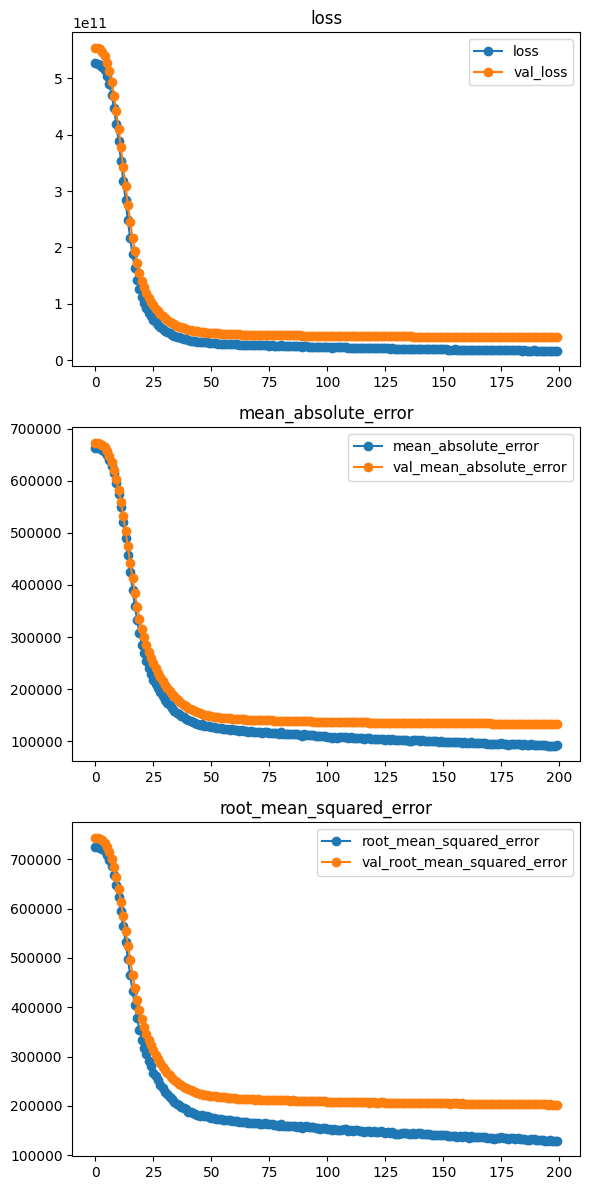

In [ ]:
# plot learning
plot_history(history_2);

In [ ]:
# evaluate model

y_pred = model_2.predict(X_test_pca)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')


39/39 [==============================] - 0s 2ms/step
final RMSE: 197089.15088628212
final MAE: 138287.89505313765
final R2: 0.5555381892176358


-  R2:  it explains that 55% of the variance in the target variable.
- MAE: the model tends to make an error of around $138,287 in predicting home selling price.

- RMSE: our model predictions make an error of from the actual selling prices by around $197,089.


## **Model 3**

- In this model, in this model will try tuning using l1/l2 regularizer to decrase overfiting from model 2.

- In the third model , we will use the following as a first step in building the model:
  - Inpuer layer: 1
  - hidden layers: 1
  - Ealry stopping = 20.
  - Dropout = 20%.
  - Epoch: 200.


In [ ]:
 early_stopping = EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(143,
                input_dim =input_shape,
                activation = 'relu'))



    model.add(Dense(120,
                activation = 'relu' ,kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))

    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'nadam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])


    return model

In [ ]:
# Call our build function to build model
model_3 = build_model()

# Get model summary
model_3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 143)               20592     
                                                                 
 dense_49 (Dense)            (None, 120)               17280     
                                                                 
 dropout_15 (Dropout)        (None, 120)               0         
                                                                 
 dense_50 (Dense)            (None, 1)                 121       
                                                                 
Total params: 37993 (148.41 KB)
Trainable params: 37993 (148.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_3 = model_3.fit(X_train_pca, y_train,
                    validation_split=.2,
                      epochs=200,
                   verbose=1, callbacks = [early_stopping])

Epoch 1/200
93/93 [==============================] - 2s 6ms/step - loss: 525975388160.0000 - mean_absolute_error: 663136.3750 - root_mean_squared_error: 725241.6250 - val_loss: 554160619520.0000 - val_mean_absolute_error: 673108.1875 - val_root_mean_squared_error: 744419.6250
Epoch 2/200
93/93 [==============================] - 0s 3ms/step - loss: 525326188544.0000 - mean_absolute_error: 662702.8750 - root_mean_squared_error: 724793.8750 - val_loss: 552933916672.0000 - val_mean_absolute_error: 672314.6250 - val_root_mean_squared_error: 743595.2500
Epoch 3/200
93/93 [==============================] - 0s 3ms/step - loss: 523003166720.0000 - mean_absolute_error: 661217.0625 - root_mean_squared_error: 723189.5625 - val_loss: 549512511488.0000 - val_mean_absolute_error: 670196.4375 - val_root_mean_squared_error: 741291.1250
Epoch 4/200
93/93 [==============================] - 0s 3ms/step - loss: 517597495296.0000 - mean_absolute_error: 657855.7500 - root_mean_squared_error: 719442.5000 - va

- The training of the model completed all the givin epochs




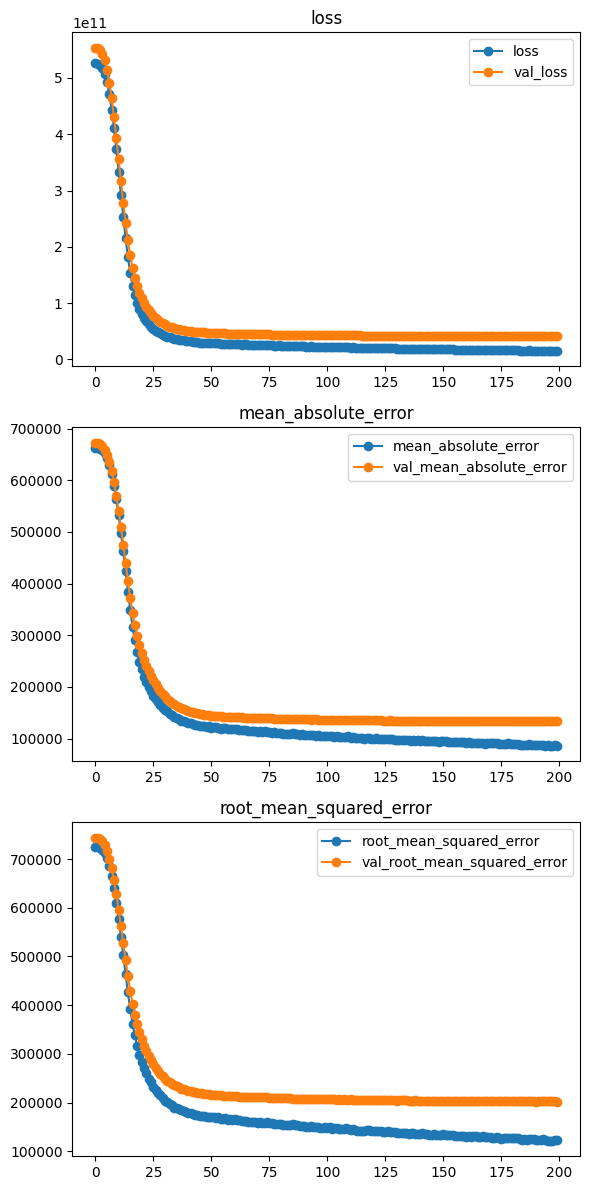

In [ ]:
# plot learning
plot_history(history_3);

- there is a significant improvement after using l1/l2 regularizer , and overfitting issue handeld better and the stabilization of loss has been achieved.

-

In [ ]:
# evaluate model

y_pred = model_3.predict(X_test_pca)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

39/39 [==============================] - 0s 2ms/step
final RMSE: 198667.4828300563
final MAE: 139407.79521761133
final R2: 0.5483909953259942


-  R2:  it explains that 55% of the variance in the target variable.
- MAE: the model tends to make an error of around $139,407 in predicting home selling price.

- RMSE: our model predictions make an error of from the actual selling prices by around $198,667.


## **Comparing models**

- **Model 1:**

-  R2:  it explains that 54% of the variance in the target variable.
- MAE: the model tends to make an error of around $138,760 in predicting home selling price.

- RMSE: our model predictions make an error of from the actual selling prices by around $198,574.


- **Model 2:**

-  R2:  it explains that 55% of the variance in the target variable.
- MAE: the model tends to make an error of around $138,287 in predicting home selling price.

- RMSE: our model predictions make an error of from the actual selling prices by around $197,089.


- **Model 3:**

-  R2:  it explains that 55% of the variance in the target variable.
- MAE: the model tends to make an error of around $139,407 in predicting home selling price.

- RMSE: our model predictions make an error of from the actual selling prices by around $198,667.



- The best model is model 2 in comparing to loss plots history and metrics results, where it achieves stabilization in the loss.


---




- **the result from the model 2**:

  - It has the highest R2 score (55%), indicating it explains slightly more variance in the target variable compared to the other models.

  - It has the lowest MAE ($138,287), indicating it makes the smallest average error in predictions.

  - It has the lowest RMSE ($197,089), indicating its predictions are closest to the actual values on average.


- **the model was trained with the following parametrs:**

  - early stop 20 patience
  - 200 epochs
  - 2 hidden layers using l1_l2 regularizes.
  - drop out rate of 0.2


- **the model have the following layers:**

  - inpuet layer : 120
  - Hiddent layer : 100


- **activation:**

  - Linear (Regression)
  - Optimizer: nadam

---

- **focus metric:**
 - RMSE

---
our model offers a solid foundation for estimating home selling prices, with R2 scores 55%. Although demonstrating moderate accuracy with average errors of approximately  $138,000 (MAE),

and disparities from actual prices of around $197,000 (RMSE).


 Further optimization could enhance the predictive power, offering more reliable insights identifying preferred properties and optimizing investment decisions.


- Based on our model's performance metrics, here's how effectively it addresses the business problem:

  - Identifying Undervalued Properties:

    - Our model effectively identifies properties that are likely priced below their actual market value. This capability allows the company to focus on promising investment opportunities where higher profits can be realized.

  - Segmentation and Analysis:

    - By segmenting properties based on price predictions and relevant criteria, the company gains insights into different market segments. This differentiation helps in making better strategic decisions, such as targeting specific customer segments or enhancing marketing efforts.

  - Predicting Selling Prices:

    - The model's ability  predict selling prices enables the company to make informed decisions regarding property acquisition and sales strategies. This reduces the negative impact of pricing uncertainty and increases profitability by minimizing the risk of overpaying for properties.
  


Overall, our model provides a foundation for solving the business problem by accurately forecasting property selling prices, identifying investment opportunities, and supporting strategic decision-making in real estate investments.